#### tanΘ = 높이 / 너비
#### 양변에 아크 탄젠트 적용
#### Θ tan^(-1)(높이 / 너비)

In [9]:
import math
def to_degree(radian):
    return radian * 180 / math.pi
my_ball = (0, 0)
target_ball = (1, 1)
# 각도계산
width = target_ball[0] - my_ball[0]
height = target_ball[1] - my_ball[1]
theta = math.atan(height / width)
print('라디안', theta)    # radian 각도 => degree 각도로 변환
                # 라디안(Θ) : 각도(χ) = 2π : 360˚
                # χ * 2π = Θ * 360˚
                # χ = Θ * 360˚ / 2π = Θ * 180˚ / π
degree = to_degree(theta)
print('각도', degree)

라디안 0.7853981633974483
각도 45.0


In [ ]:
#각도(χ) 구하는 함수
def to_degree(radian):
    return radian * 180 / math.pi
# 내장함수로도 구할 수 있음
degree = math.degrees(theta)

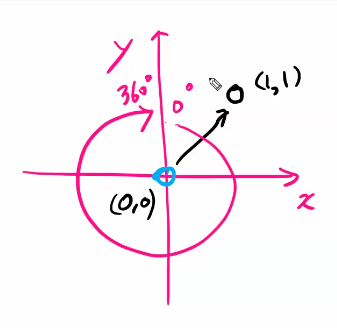
   
   위에서 작성한 코드에 보정이 필요함 90-Θ

(0,0)과 (1,1) 일경우는 위와 같지만
(0,0)과 (-1,-1) 일 경우는 또 다르다

Θ의 문제점은 1,3분면을 구분할 수 없고, 2,4분면을 구분할 수 없다

actan을 사용하면
1,4분면과 2,3분면을 기준으로 나눠서 생각할 수 있다
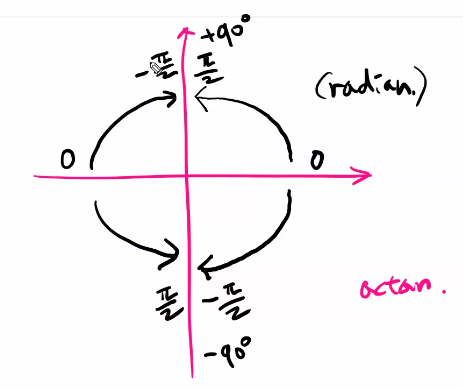

이래도 4분면을 모두 파악하기 어렵기때문에
atan2가 탄생 : 4분면 파악 가능   


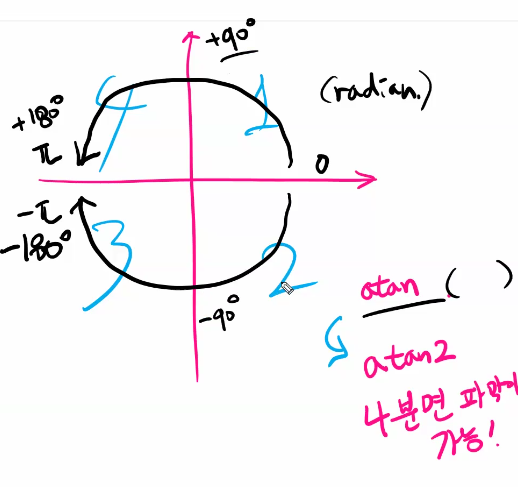

In [10]:
# atan2(높이,너비)
import math
def to_degree(radian):
    return radian * 180 / math.pi
my_ball = (0, 0)
target_ball = (-1, -1)
# 각도계산
width = target_ball[0] - my_ball[0]
height = target_ball[1] - my_ball[1]
theta = math.atan2(height, width)
print('라디안', theta)    # radian 각도 => degree 각도로 변환
                # 라디안(Θ) : 각도(χ) = 2π : 360˚
                # χ * 2π = Θ * 360˚
                # χ = Θ * 360˚ / 2π = Θ * 180˚ / π
degree = to_degree(theta)
print('각도', degree)

라디안 -2.356194490192345
각도 -135.0


하지만 우리가 만들어야하는 코드는 전체 360도를 구해야한다
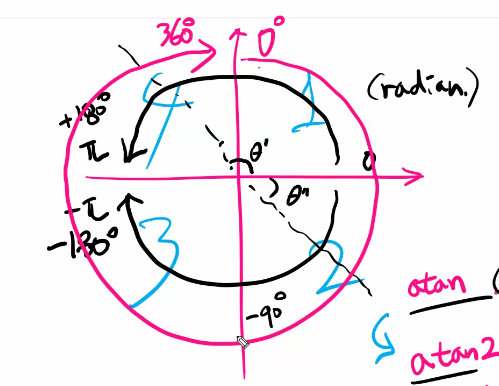

힌트는 1사분면에 해당하는 값을 바꾸면된다. 움,,,
# 만들어봐라.

# 파워

In [ ]:
# atan2(높이,너비)
import math
def to_degree(radian):
    return radian * 180 / math.pi
my_ball = (0, 0)
target_ball = (-1, -1)
# 파워 power (두 공 사이에 간격) 피타고라스의 삼각형
# a^2 + b^2 = c^2
# c(두 공사이의 간격) = sqrt(a ** 2 + b ** 2)
distance = math.sqrt((target_ball[0] - my_ball[0] ** 2 + (target_ball[1] - my_ball[1]) ** 2))
power = max(10.0,distance * 2) # 0~100 (권장 파워는 10 이상, 100이상넘길수있지만 100으로고정)
# 각도계산
width = target_ball[0] - my_ball[0]
height = target_ball[1] - my_ball[1]
theta = math.atan2(height, width)
print('라디안', theta)    # radian 각도 => degree 각도로 변환
                # 라디안(Θ) : 각도(χ) = 2π : 360˚
                # χ * 2π = Θ * 360˚
                # χ = Θ * 360˚ / 2π = Θ * 180˚ / π
degree = to_degree(theta)
print('각도', degree)

# TODO : 4분면에 일타싸피에서 요구하는 각도로 값을 변경하기

#return power, degree   함수전달

랜덤함수로 각도나 세기를 미세조절

In [ ]:
import socket
import time
import math

# 닉네임을 사용자에 맞게 변경해 주세요.
NICKNAME = 'BUK02_LEEDONGHOON'

# 일타싸피 프로그램을 로컬에서 실행할 경우 변경하지 않습니다.
HOST = '127.0.0.1'

# 일타싸피 프로그램과 통신할 때 사용하는 코드값으로 변경하지 않습니다.
PORT = 1447
CODE_SEND = 9901
CODE_REQUEST = 9902
SIGNAL_ORDER = 9908
SIGNAL_CLOSE = 9909


# 게임 환경에 대한 상수입니다.
TABLE_WIDTH = 254
TABLE_HEIGHT = 127
NUMBER_OF_BALLS = 6
HOLES = [[0, 0], [127, 0], [254, 0], [0, 127], [127, 127], [254, 127]]

order = 1
balls = [[0, 0] for i in range(NUMBER_OF_BALLS)]

sock = socket.socket()
print('Trying to Connect: %s:%d' % (HOST, PORT))
sock.connect((HOST, PORT))
print('Connected: %s:%d' % (HOST, PORT))

send_data = '%d/%s' % (CODE_SEND, NICKNAME)
sock.send(send_data.encode('utf-8'))
print('Ready to play!\n--------------------')


while True:

    # Receive Data
    recv_data = (sock.recv(1024)).decode()
    print('Data Received: %s' % recv_data)

    # Read Game Data
    split_data = recv_data.split('/')
    idx = 0
    try:
        for i in range(NUMBER_OF_BALLS):
            for j in range(2):
                balls[i][j] = float(split_data[idx])
                idx += 1
    except:
        send_data = '%d/%s' % (CODE_REQUEST, NICKNAME)
        print("Received Data has been currupted, Resend Requested.")
        continue

    # Check Signal for Player Order or Close Connection
    if balls[0][0] == SIGNAL_ORDER:
        order = int(balls[0][1])
        print('\n* You will be the %s player. *\n' % ('first' if order == 1 else 'second'))
        continue
    elif balls[0][0] == SIGNAL_CLOSE:
        break

    # Show Balls' Position
    print('====== Arrays ======')
    for i in range(NUMBER_OF_BALLS):
        print('Ball %d: %f, %f' % (i, balls[i][0], balls[i][1]))
    print('====================')

    angle = 0.0
    power = 0.0

    ##############################
    # 이 위는 일타싸피와 통신하여 데이터를 주고 받기 위해 작성된 부분이므로 수정하면 안됩니다.
    #
    # 모든 수신값은 변수, 배열에서 확인할 수 있습니다.
    #   - order: 1인 경우 선공, 2인 경우 후공을 의미
    #   - balls[][]: 일타싸피 정보를 수신해서 각 공의 좌표를 배열로 저장
    #     예) balls[0][0]: 흰 공의 X좌표
    #         balls[0][1]: 흰 공의 Y좌표
    #         balls[1][0]: 1번 공의 X좌표
    #         balls[4][0]: 4번 공의 X좌표
    #         balls[5][0]: 마지막 번호(8번) 공의 X좌표

    # 여기서부터 코드를 작성하세요.
    # 아래에 있는 것은 샘플로 작성된 코드이므로 자유롭게 변경할 수 있습니다.

    # 원래 컨셉은 hole에서 타겟과 가장 가까운곳을 탐색해서 경로상의 각도를 구하고 정확하게 들어가게 하려고 구현하려 했으나,
    # 무슨 문제인지 코드가 꼬여서 제대로 진행이 되지 않았습니다. 그래서 우선은 두께는 무시하고 정 가운데를 쳐서 넣는 코드로 완성하였습니다.


    # whiteBall_x, whiteBall_y: 흰 공의 X, Y좌표를 나타내기 위해 사용한 변수
    whiteBall_x = balls[0][0]
    whiteBall_y = balls[0][1]

    # targetBall_x, targetBall_y: 목적구의 X, Y좌표를 나타내기 위해 사용한 변수

    if order == 1:
        if balls[1][0] > 0:
            targetBall_x = balls[1][0]
            targetBall_y = balls[1][1]
        elif balls[1][0] == -1:
            targetBall_x = balls[3][0]
            targetBall_y = balls[3][1]
            if balls[3][0] == -1:
                targetBall_x = balls[5][0]
                targetBall_y = balls[5][1]

    else:
        if balls[2][0] > 0:
            targetBall_x = balls[2][0]
            targetBall_y = balls[2][1]
        elif balls[2][0] == -1:
            targetBall_x = balls[4][0]
            targetBall_y = balls[4][1]
            if balls[4][0] == -1:
                targetBall_x = balls[5][0]
                targetBall_y = balls[5][1]

    min_num = 999999999999
    pos = []

    # 각도의 차이가 가장 작은쪽

    for k in range(6):
        if min_num > ((HOLES[k][0] - targetBall_x) ** 2 + (HOLES[k][1] - targetBall_y) ** 2 ) ** 0.5:
            pos.append(HOLES[k][0])
            pos.append(HOLES[k][1])
            min_num = ((HOLES[k][0] - targetBall_x) ** 2 + (HOLES[k][1] - targetBall_y) ** 2 ) ** 0.5


    print(pos)

    # width, height: 목적구와 흰 공의 X좌표 간의 거리, Y좌표 간의 거리
    width = abs(targetBall_x - whiteBall_x)
    height = abs(targetBall_y - whiteBall_y)

    # pos[-1] = y좌표
    # pos[-2] = x좌표

    # 1번앵글 홀과 목적구 사이의 각도 출력
    a = math.atan(abs(pos[-1] - targetBall_y)/ abs(pos[-2] - targetBall_x))

    # 목적구와 하얀공 사이의 각도 출력력

    b = math.atan(height/width)

    # 각도 출력

    c = math.cos(abs(a - b)) * 2 * 5.73

    d = (180 / math.pi) * (math.atan(abs(math.sin(abs(b - a)) * 2 * 5.73) / abs(math.sqrt(width**2 + height**2) - c)))

    # radian: width와 height를 두 변으로 하는 직각삼각형의 각도를 구한 결과
    #   - 1radian = 180 / PI (도)
    #   - 1도 = PI / 180 (radian)
    # angle: 아크탄젠트로 얻은 각도 radian을 degree로 환산한 결과
    print((math.atan(abs(math.sin(abs(b - a)) * 2 * 5.73) / abs(math.sqrt(width**2 + height**2) - c))))
    print(d)

    radian = math.atan(width / height) if height > 0 else 0
    # 목적구가 흰 공을 중심으로 3사분면에 위치했을 때 각도를 재계산
    if whiteBall_x > targetBall_x and whiteBall_y > targetBall_y:
        radian = math.atan(width / height)
        if a > b:
            angle = (180 / math.pi * (radian)) + 180 - d * 0.2
        else:
            angle = (180 / math.pi * (radian)) + 180 + d * 0.2

    # 목적구가 흰 공을 중심으로 4사분면에 위치했을 때 각도를 재계산
    elif whiteBall_x < targetBall_x and whiteBall_y > targetBall_y:
        radian = math.atan(height / width)
        if a > b:
            angle = (180 / math.pi * (radian)) + 90 - d * 0.2
        else:
            angle = (180 / math.pi * (radian)) + 90 + d * 0.2

    # 목적구가 흰 공을 중심으로 1사분면에 위치했을 때 각도를 재계산
    elif whiteBall_x > targetBall_x and whiteBall_y < targetBall_y:
        radian = math.atan(height / width)
        if a > b:
            angle = (180 / math.pi * (radian)) + 270 - d * 0.2
        else:
            angle = (180 / math.pi * (radian)) + 270 + d * 0.2
    else:
        if a > b:
            angle = (180 / math.pi * radian) - d * 0.2
        else:
            angle = (180 / math.pi * radian) + d * 0.2

    # distance: 두 점(좌표) 사이의 거리를 계산
    distance = math.sqrt(width**2 + height**2)

    # power: 거리 distance에 따른 힘의 세기를 계산
    power = distance * 0.17 + ((HOLES[k][0] - targetBall_x) ** 2 + (HOLES[k][1] - targetBall_y) ** 2) ** 0.5 * 0.17

    # 주어진 데이터(공의 좌표)를 활용하여 두 개의 값을 최종 결정하고 나면,
    # 나머지 코드에서 일타싸피로 값을 보내 자동으로 플레이를 진행하게 합니다.
    #   - angle: 흰 공을 때려서 보낼 방향(각도)
    #   - power: 흰 공을 때릴 힘의 세기
    #
    # 이 때 주의할 점은 power는 100을 초과할 수 없으며,
    # power = 0인 경우 힘이 제로(0)이므로 아무런 반응이 나타나지 않습니다.
    #
    # 아래는 일타싸피와 통신하는 나머지 부분이므로 수정하면 안됩니다.
    ##############################

    merged_data = '%f/%f/' % (angle, power)
    sock.send(merged_data.encode('utf-8'))
    print('Data Sent: %s' % merged_data)

sock.close()
print('Connection Closed.\n--------------------')